<a href="https://colab.research.google.com/github/KunpengXu/Time-series-Forecasting/blob/main/BigMartSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('train_XnW6LSF.csv')
data_test=pd.read_csv('test_FewQE9B.csv')

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 12)

In [ ]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
submission=[]
submission=pd.DataFrame(data_test.Item_Identifier, columns=['Item_Identifier'])
submission['Outlet_Identifier']=data_test.Outlet_Identifier

In [ ]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean(), inplace=True)

In [ ]:
import numpy as np
np.unique(data.Outlet_Establishment_Year)

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009])

In [ ]:
#method 1
#method 2
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LF':0, 'Low Fat':0, 'low fat':0, 'Regular':1,'reg':1})
size_mapping={}
for i in range(np.unique(data.Item_Type).size):
  size_mapping[np.unique(data.Item_Type)[i]]=i
data['Item_Type']=data['Item_Type'].map(size_mapping)

In [ ]:
#method 3
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Outlet_Identifier']=label_encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Establishment_Year']=label_encoder.fit_transform(data['Outlet_Establishment_Year'])
data['Outlet_Size']=label_encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=label_encoder.fit_transform(data['Outlet_Type'])

data_test['Item_Fat_Content']=label_encoder.fit_transform(data_test['Item_Fat_Content'])
data_test['Item_Type']=label_encoder.fit_transform(data_test['Item_Type'])
data_test['Outlet_Identifier']=label_encoder.fit_transform(data_test['Outlet_Identifier'])
data_test['Outlet_Establishment_Year']=label_encoder.fit_transform(data_test['Outlet_Establishment_Year'])
data_test['Outlet_Size']=label_encoder.fit_transform(data_test['Outlet_Size'])
data_test['Outlet_Location_Type']=label_encoder.fit_transform(data_test['Outlet_Location_Type'])
data_test['Outlet_Type']=label_encoder.fit_transform(data_test['Outlet_Type'])

In [ ]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,13,107.8622,9,4,1,0,1
1,FDW14,8.300000,4,0.038428,4,87.3198,2,7,1,1,1
2,NCN55,14.600000,1,0.099575,11,241.7538,0,3,1,2,0
3,FDQ58,7.315000,1,0.015388,13,155.0340,2,7,1,1,1
4,FDY38,12.695633,2,0.118599,4,234.2300,5,0,1,2,3


In [ ]:
for i in data.columns[1:-1]:
  data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())
for i in data_test.columns[1:-1]:
  data_test[i]=(data_test[i]-data_test[i].min())/(data_test[i].max()-data_test[i].min())

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,0.0,0.048866,0.266667,0.927507,1.000000,0.500,0.5,0.0,0.333333,3735.1380
1,DRC01,0.081274,1.0,0.058705,0.933333,0.072068,0.333333,1.000,0.5,1.0,0.666667,443.4228
2,FDN15,0.770765,0.0,0.051037,0.666667,0.468288,1.000000,0.500,0.5,0.0,0.333333,2097.2700
3,FDX07,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.375,0.5,1.0,0.000000,732.3800
4,NCD19,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.125,0.0,1.0,0.333333,994.7052


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
data = data.drop('Item_Identifier', axis=1)
data_test = data_test.drop('Item_Identifier', axis=1)

In [ ]:
X=data.drop('Item_Outlet_Sales', axis=1)
y=data['Item_Outlet_Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

In [ ]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((6818, 10), (6818,)), ((1705, 10), (1705,)))

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense 

In [ ]:
X_train.shape[1]

10

In [ ]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5470,0.681453,1.0,0.198936,0.266667,0.200377,0.333333,1.000,0.5,1.0,0.666667
8431,0.901756,0.0,0.162400,0.400000,0.108248,0.777778,0.625,0.5,0.5,0.333333
3557,0.184579,0.0,0.097474,0.200000,0.364855,0.777778,0.625,0.5,0.5,0.333333
7918,0.633820,0.0,0.102473,0.600000,0.329804,1.000000,0.500,0.5,0.0,0.333333
4573,0.461149,1.0,0.176941,0.866667,0.123796,0.666667,0.750,1.0,0.5,0.333333
...,...,...,...,...,...,...,...,...,...,...
4829,0.494352,0.0,0.109210,0.666667,0.114883,0.555556,0.000,0.5,1.0,1.000000
7291,0.176541,1.0,0.134057,0.000000,0.644338,0.888889,0.250,1.0,0.0,0.333333
1344,0.493897,0.0,0.101017,0.866667,0.597424,0.666667,0.750,1.0,0.5,0.333333
7293,0.550461,1.0,0.075094,0.200000,0.238233,0.000000,0.375,0.5,1.0,0.000000


In [ ]:
input_neurons=X_train.shape[1]
output_neurons = 1
number_of_hidden_layers=5

neuron_hidden_layer={}
for i in range(4):
  neuron_hidden_layer[i]=20

neuron_hidden_layer[4]=10
'''neuron_hidden_layer_1=10
neuron_hidden_layer_2=10
neuron_hidden_layer_3=10
neuron_hidden_layer_4=10
neuron_hidden_layer_5=5'''
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
for i in range(5):
  model.add(Dense(units=neuron_hidden_layer[i],activation='relu'))
'''model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_5, activation='relu'))'''
model.add(Dense(units=output_neurons,activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
______________________________________________________

In [ ]:
model.compile(loss='MeanSquaredError', optimizer='Adam', metrics=['RootMeanSquaredError'])

In [ ]:
import os
checkpoint_path = "/content/drive/MyDrive/Checkpoint-all/BigMartPredict/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1
                                                 )


In [ ]:
model_history=model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[cp_callback])

Epoch 1/50
214/214 [==============================] - 3s 4ms/step - loss: 7340691.1256 - root_mean_squared_error: 2706.1357 - val_loss: 2647151.7500 - val_root_mean_squared_error: 1627.0070

Epoch 00001: saving model to /content/drive/MyDrive/Checkpoint-all/BigMartPredict/training_1/cp.ckpt
Epoch 2/50
214/214 [==============================] - 1s 2ms/step - loss: 2468482.3547 - root_mean_squared_error: 1570.4161 - val_loss: 1946943.0000 - val_root_mean_squared_error: 1395.3290

Epoch 00002: saving model to /content/drive/MyDrive/Checkpoint-all/BigMartPredict/training_1/cp.ckpt
Epoch 3/50
214/214 [==============================] - 1s 3ms/step - loss: 1741553.5122 - root_mean_squared_error: 1319.0843 - val_loss: 1439600.7500 - val_root_mean_squared_error: 1199.8336

Epoch 00003: saving model to /content/drive/MyDrive/Checkpoint-all/BigMartPredict/training_1/cp.ckpt
Epoch 4/50
214/214 [==============================] - 1s 2ms/step - loss: 1465608.7134 - root_mean_squared_error: 1210.4169 

In [ ]:
!ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/drive/MyDrive/Checkpoint-all/BigMartPredict/training_1/cp.ckpt'

In [ ]:
prediction=(model.predict(data_test))

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
submission['Item_Outlet_Sales']=prediction
submission.index=submission['Item_Identifier']
submission.drop('Item_Identifier', axis=1)

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,2889.207520
FDW14,OUT017,2062.051758
NCN55,OUT010,793.468994
FDQ58,OUT017,3103.788086
FDY38,OUT027,14712.425781
...,...,...
FDB58,OUT046,2997.281738
FDD47,OUT018,6211.306641
NCO17,OUT045,2653.941650


In [ ]:
submission.to_csv('submission.csv', index=False)

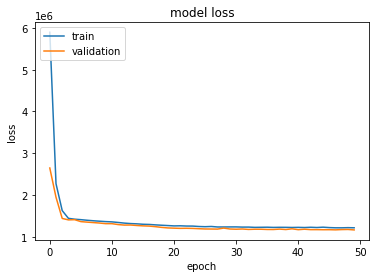

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(model_history.history['root_mean_squared_error'])
plt.plot(model_history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()